In [ ]:
# only execute once if necessary
!pip install scikit-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import the package that will be used
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris() # dictionary
print(iris)
# pay attention to the keywords: (1) "data", (2) "feature_names", (3) "target", and (4) "target_names"

# Warm up
What is the **shape** (dimension) of the data? What is the **average** petal length? 

In [ ]:
# print(iris['data'])
data_shape = iris.data.shape
print("data shape:",data_shape)

# the 3th feature is petal length
print(iris.feature_names)

mean_petal_len = np.mean(iris.data[:,2])  # use index 2 for petal length
print("the mean petal length:",mean_petal_len)

data shape: (150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
the mean petal length: 3.7580000000000005


# Class Exercise

## A)
Apart from **petal length**, is there **any other feature** that can also be used to fully separate iris setosa(A) vs versicolor(B)? Please make a **scatter plot** to show that.

selected features (x): sepal length (cm)
selected features (y): sepal width (cm)


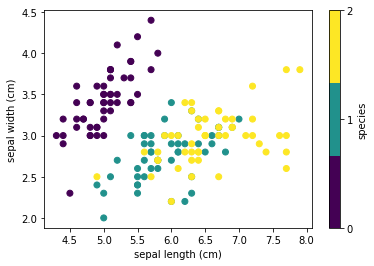

In [ ]:
# example
x_index = 0 # index of feature
y_index = 1 # index of feature
print("selected features (x):",iris.feature_names[x_index])
print("selected features (y):",iris.feature_names[y_index])

plt.scatter(iris.data[:,x_index],
            iris.data[:, y_index],
            c=iris.target,
            cmap=plt.cm.get_cmap(lut=3))
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.colorbar(ticks=[0,1,2],label="species")
plt.show()

selected features (x): petal length (cm)
selected features (y): petal width (cm)


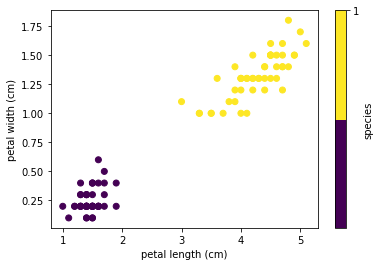

In [ ]:
# Part A
# four features in total, you may test all the feature
x_index = 2 # index of feature 1
y_index = 3 # index of feature 2
print("selected features (x):",iris.feature_names[x_index])
print("selected features (y):",iris.feature_names[y_index])

# exclude iris virginica (C)
excl = 2

# Plot the feature 1 against feature 2 data
plt.scatter(iris.data[iris.target!=excl,x_index],
            iris.data[iris.target!=excl,y_index], 
            c=iris.target[iris.target!=excl],
            cmap=plt.cm.get_cmap(lut=2))
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.colorbar(ticks=[1,2],label="species")
plt.show()

## B)
**Train** a decision tree to classify iris setosa(A) vs versicolor(B) vs virginica(C). Can all three species be **fully separated**? What’s the **optimal tree depth**?

120
30


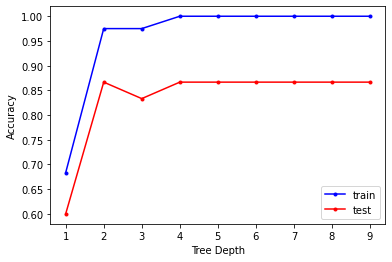

In [ ]:
# Part B
from sklearn.model_selection import train_test_split
X = iris.data # features 
y = iris.target # labels 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =2000) # train test split
print(len(X_train)) #number of training data
print(len(X_test)) #number of test data

#Create empty list for storing the scores
score_test = []
score_train = []

#Start the iteration to get the scores for each max depth
for i in np.arange(1,10): 
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    score_train += [clf.score(X_train, y_train) ] #Append the score for train
    score_test += [clf.score(X_test, y_test) ] #Append the score for test

plt.plot(np.arange(1,10), score_train, 'b.-', label="train")  #plot the training data
plt.plot(np.arange(1,10), score_test, 'r.-', label="test")  #plot the test data
plt.xlabel("Tree Depth" ) 
plt.ylabel( "Accuracy") 
plt.legend()
plt.show()


[Text(0.3333333333333333, 0.9, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [42, 40, 38]'),
 Text(0.16666666666666666, 0.7, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.5, 0.7, 'X[2] <= 4.75\ngini = 0.5\nsamples = 78\nvalue = [0, 40, 38]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.6666666666666666, 0.5, 'X[2] <= 4.95\ngini = 0.136\nsamples = 41\nvalue = [0, 3, 38]'),
 Text(0.5, 0.3, 'X[3] <= 1.65\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8333333333333334, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

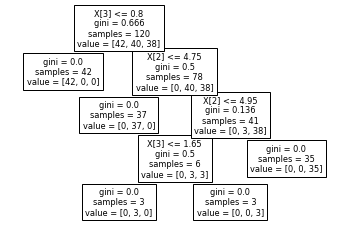

In [ ]:
# plot the "tree"

# refer to previous result
# depth of 4 for random state 2000
opt_depth = 4
clf = tree.DecisionTreeClassifier(max_depth=opt_depth)
clf.fit(X_train, y_train)
tree.plot_tree(clf)

## C) 
**Evaluate** the classifier by using **confusion matrix** and **accuracy**.
Given an iris flower has a feature array [5.1, 3.8, 1.5, 0.3], make a prediction using the trained classifier.

Predicted classses:
 [0 1 0 1 2 2 2 2 0 0 1 0 2 1 1 2 2 1 0 2 2 0 1 2 1 0 2 2 2 2]
Actual classes:
 [0 1 0 1 2 2 2 1 0 0 1 0 2 1 2 2 2 1 0 2 1 0 1 2 1 0 2 2 1 2]
['setosa' 'versicolor' 'virginica']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


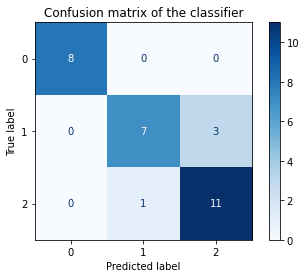

Accuracy: 0.8666666666666667


In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

# prediction on test dataset
y_pred = clf.predict(X_test)
# compare predicted classes to actual classes
print("Predicted classses:\n",y_pred)
print("Actual classes:\n",y_test)

print(iris.target_names)
labels=[0,1,2]  # correspond to "setosa"(0), "versicolor"(1) and "virginica"(2)
cm = plot_confusion_matrix(clf,X_test, y_test,labels=labels,cmap="Blues")
plt.title("Confusion matrix of the classifier")
plt.show()

ac = accuracy_score(y_test, y_pred)
print(f"Accuracy: {ac}")
# print(clf.score(X_test, y_test))

In [ ]:
# Implementation: predict the class/species of new data
print(iris.feature_names)
X_new = np.array([[5.1, 3.8, 1.5, 0.3]])
y_new = clf.predict(X_new)
print("The predicted classes:",y_new)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The predicted classes: [0]
